**Titanic EDA Template**

This notebook guides you through an Exploratory Data Analysis of the Titanic dataset in Google Colab. After each code cell that produces a chart, a separate markdown note highlights the key insight.


**1. Environment Setup and Dependency Check**

In [2]:
try:
    import matplotlib.pyplot as plt
    import seaborn as sns
except ModuleNotFoundError:
    print("Required plotting libraries not found. Installing matplotlib and seaborn...")
    # Uncomment the next line to install dependencies in Jupyter
    # !pip install matplotlib seaborn
    raise

import pandas as pd
import numpy as np

# Ensure plots appear inline in a Jupyter environment
%matplotlib inline




**2. Load the Data**

In [3]:
df = pd.read_csv('train.csv')
print(f"DataFrame loaded: {df.shape[0]} rows, {df.shape[1]} columns")


DataFrame loaded: 891 rows, 12 columns


**3. Initial Exploration**

In [4]:
df.head()
df.info()
df.describe()

missing = df.isnull().mean() * 100
print("Missing values (in %):")
print(missing)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Missing values (in %):
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000

We see data types and non-missing counts; columns like **Age** and **Cabin** have missing values.

Numeric summaries for **Fare** and **Age** show ranges, means, and quartiles.

Missing-value percentages highlight that **Age** (~20%) and **Cabin** (>75%) require handling.


**4. Univariate Analysis**

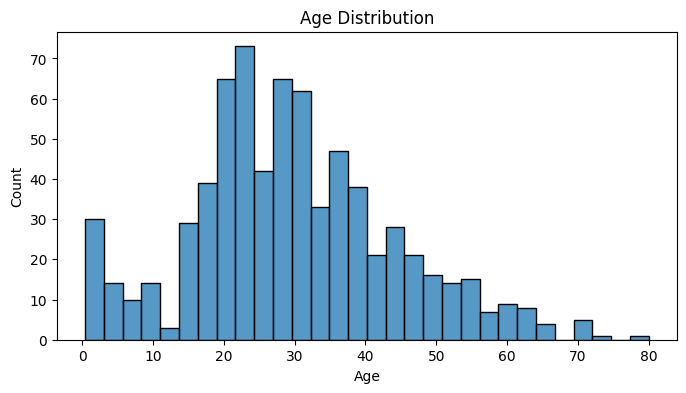

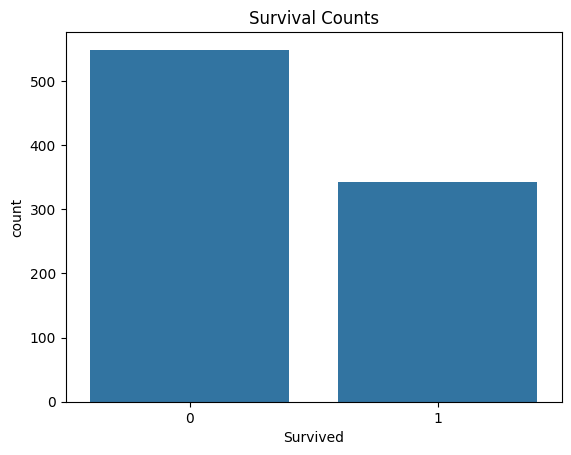

In [5]:
plt.figure(figsize=(8,4))
sns.histplot(df['Age'].dropna(), bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

g = sns.countplot(x='Survived', data=df)
g.set_title('Survival Counts')
plt.show()


Most passengers were young adults aged 20–40, with fewer children and seniors.

More passengers died (0) than survived (1); roughly two-thirds fatality.


**5. Bivariate Analysis**

Survival rate by sex:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


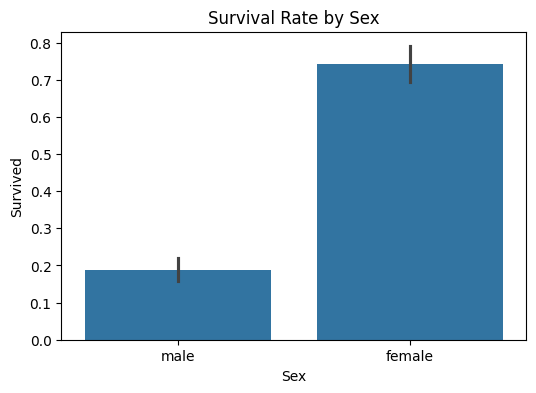

In [6]:
survival_by_sex = df.groupby('Sex')['Survived'].mean()
print("Survival rate by sex:")
print(survival_by_sex)

plt.figure(figsize=(6,4))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Sex')
plt.show()


74% of women survived compared to only 19% of men, indicating a strong gender effect.


**6. Multivariate Analysis**

<Figure size 400x300 with 0 Axes>

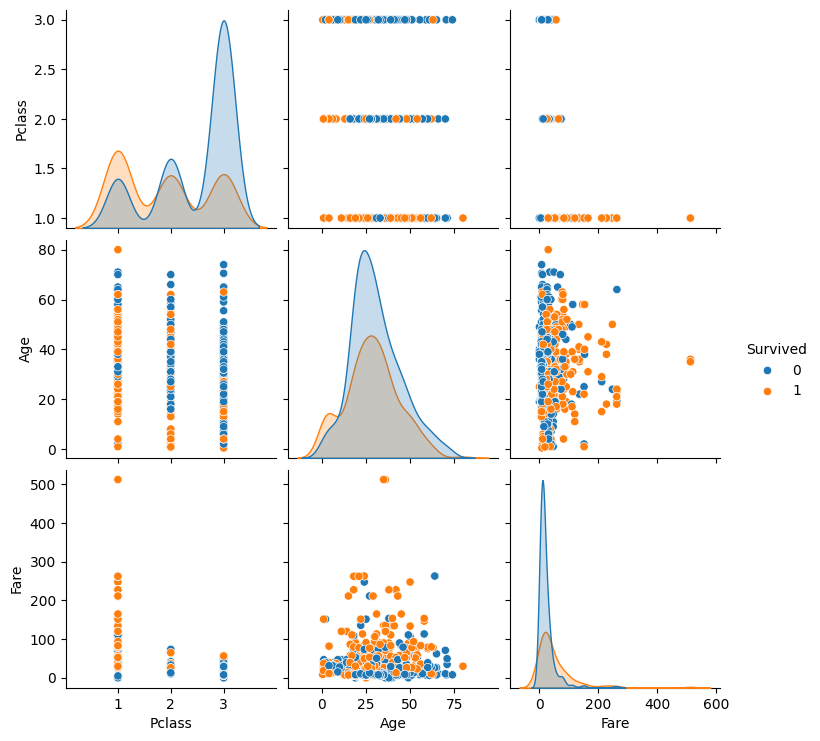

In [16]:
features = ['Survived', 'Pclass', 'Age', 'Fare']
plt.figure(figsize=(4,3))
sns.pairplot(df[features].dropna(), hue='Survived')
plt.show()




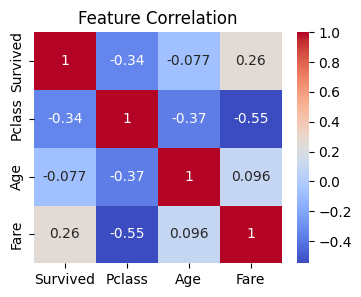

In [18]:
tcorr = df[features].corr()
plt.figure(figsize=(4,3))
sns.heatmap(tcorr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

Survivors cluster in higher classes (Pclass 1 & 2) and tend to pay higher fares.

Strong negative correlation between Pclass and Fare; positive correlation between Fare and survival.



**7. Handling Skewed Data**

Fare skewness: 4.79


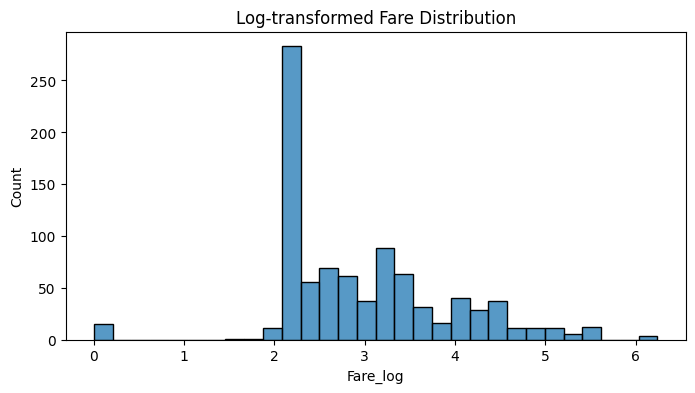

In [9]:
fare_skew = df['Fare'].skew()
print(f"Fare skewness: {fare_skew:.2f}")

if abs(fare_skew) > 1:
    df['Fare_log'] = np.log1p(df['Fare'])
    plt.figure(figsize=(8,4))
    sns.histplot(df['Fare_log'], bins=30)
    plt.title('Log-transformed Fare Distribution')
    plt.show()
else:
    print("Fare distribution is not highly skewed; log transform not necessary.")


Log-transform compresses extreme fares and yields a more symmetric distribution when skew > 1.


**8. Anomalies and Outliers**

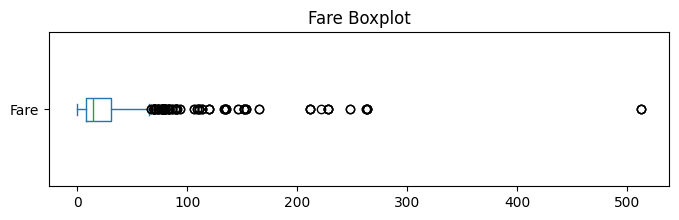

In [10]:
df[['Fare']].plot(kind='box', vert=False, figsize=(8,2))
plt.title('Fare Boxplot')
plt.show()


Boxplot reveals several extreme fare outliers above the upper quartile worth further investigation.


**9. Summary of Findings**
- Women and children exhibit markedly higher survival rates than men.
- First-class passengers and those paying higher fares had better odds.
- Significant missing data in **Cabin** and moderate in **Age**; log-transform helps with skewed **Fare**.
